Import necessary packages.

In [52]:
import sklearn
import sklearn.datasets
import sklearn.metrics
import sklearn.preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import dimod

Classify two classes of half-moons

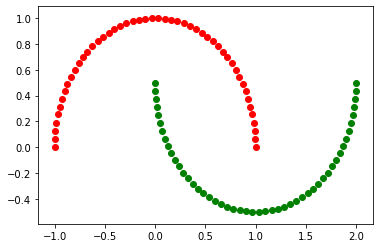

In [59]:
scal = sklearn.preprocessing.StandardScaler()
norm = sklearn.preprocessing.Normalizer()
data,labels=sklearn.datasets.make_moons()
index=np.arange(len(labels))
# Shuffle the index
np.random.shuffle(index)
train1=index[:4*len(index)//5]
test1=index[:1*len(index)//5]
#Form the new train2 and test2 with train1 and test1
train2=data[train1]
test2=data[test1]
# Apply scalar and normalizer fits 
train2=scal.fit_transform(train2)
train2 = norm.fit_transform(train2)

test2 = scal.fit_transform(test2)
test2 = norm.fit_transform(test2)
#
final_train = 2 * labels[train1] - 1
final_test = 2 * labels[test1] - 1
plt.scatter(data[labels == 0, 0], data[labels == 0,1], color='red')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color='green');
plt.show()

In [60]:
metric = sklearn.metrics.accuracy_score
model1 = AdaBoostClassifier(n_estimators=5) 
model1.fit(train2, final_train)
print(model1)
print('Train accuracy:')
print((metric(final_train, model1.predict(train2))))
print('Test accuracy:')
print((metric(final_test, model1.predict(test2))))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=None)
Train accuracy:
0.8875
Test accuracy:
0.8


We see that the train and test accuracies are very close. AdaBoost has shown good performance. Now test using a support vector machine. 

In [61]:
model2 = SVC()
model2.fit(train2, final_train)
print(model2)
print('Train accuracy:')
print((metric(final_train, model2.predict(train2))))
print('Test accuracy:')
print((metric(final_test, model2.predict(test2))))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Train accuracy:
0.8875
Test accuracy:
0.85


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
